### Importing the necessary libararies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


The above dataset of this particular problem. I have to predict whether the loan will be approved or not so loan status is my target columns and the data type is categorical. It is called classification problem.

## Preprocessing and EDA:

In [5]:
df.shape

(614, 13)

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The dataset contains object,integer and float type of data. Since we have object data type so will take care of them by using appropriate encoding methods.

In [7]:
# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


The above are the categorical columns in the given dataset.

In [8]:
# Lets checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


The columns 'Loan_Amount_Term','Credit_History' have categories in integer data type so they also comes under categorical type. The above are numerical columns present in the dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are some null values in some of the columns and have to replace those null values.

In [10]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

The above are the unique values present in the columns.

In [12]:
for i in df.columns:
    print(df[i].value_counts())
    print('******************************************')

LP002161    1
LP001657    1
LP002188    1
LP002141    1
LP001580    1
           ..
LP002941    1
LP001289    1
LP001482    1
LP001325    1
LP002266    1
Name: Loan_ID, Length: 614, dtype: int64
******************************************
Male      489
Female    112
Name: Gender, dtype: int64
******************************************
Yes    398
No     213
Name: Married, dtype: int64
******************************************
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
******************************************
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
******************************************
No     500
Yes     82
Name: Self_Employed, dtype: int64
******************************************
2500    9
6000    6
2600    6
4583    6
4166    5
       ..
5503    1
3450    1
2425    1
2423    1
4095    1
Name: ApplicantIncome, Length: 505, dtype: int64
******************************************
0.0       273
2500.0      5
2083.0      5
1

The above are list of values counts present in each columns. The column Loan_ID given to the applications. It has no significane in the prediction. Let's drop this column.

In [13]:
df.drop("Loan_ID",axis=1,inplace=True)

In [14]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The above i can see the missing values in the columns: Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History. I have to replace these null values using imputation techniques.

<AxesSubplot:>

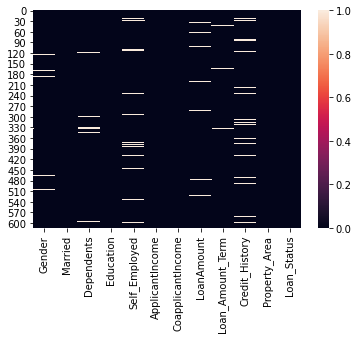

In [16]:
sns.heatmap(df.isnull())

By visualization i can notice the null values.

## Imputation technique to replace NaN values:

There is skewness in all the numerical column so i can not replace the NaN values with mean I have replace it with median.

In [18]:
# Replacing NaN values in numerical columns
df["LoanAmounnt"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

Replaced the null values in numerical columns by there median.

In [19]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Dependents"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Self_Employed"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mode()[0])
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

Replaced the null values in categorical columns by there mode.

In [20]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmounnt          0
dtype: int64

I can see the null values has been removed.

<AxesSubplot:>

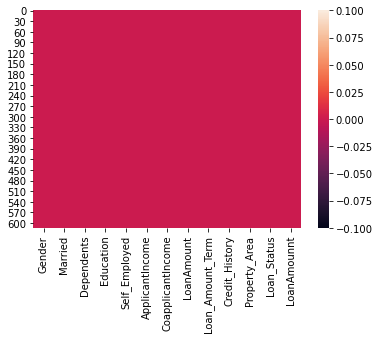

In [21]:
sns.heatmap(df.isnull())

I can clear see that there are no missing values anymore.

In [22]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [23]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

We have two counts in Loan_Status namely "Y" and "N". Here "Y" stands for "Yes" that is the loan of the applicant is approved and "N" stands for "No" that is the loan of the applicant is not approved.

In [24]:
df.loc[df['Loan_Status']==" "]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmounnt


In [25]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmounnt
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049,145.752443
std,6109.041673,2926.248369,84.180967,64.428629,0.352339,84.107233
min,150.000000,0.000000,9.000000,12.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,100.250000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000,128.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,164.750000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,700.000000


This gives the statistical information of the dataset. There are no negative values and invalid values are present.This gives the summary of numerical data.

The mean value and 2nd quantile value has high difference in almost all the columns which means there is a lot of outliers in all the columns.

The count is same which means no null values.

Minimum loan term is 12.

Minimum loan amount is 9.

### Data Visualization:
### Univariate Analysis:

Y    422
N    192
Name: Loan_Status, dtype: int64


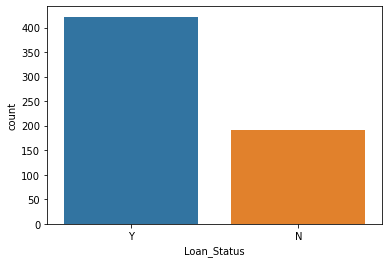

In [26]:
#Visualizing the loan approval status
print(df["Loan_Status"].value_counts())
sns.countplot(df["Loan_Status"])
plt.show()

Male      502
Female    112
Name: Gender, dtype: int64


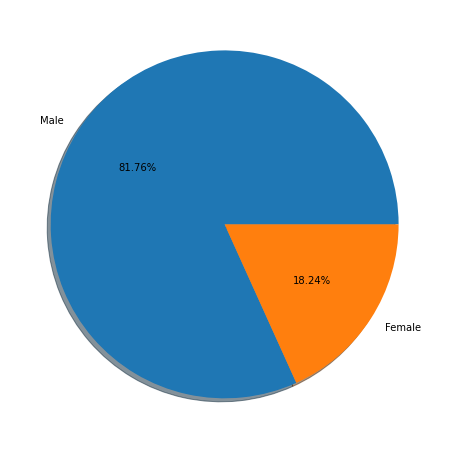

In [27]:
#Visualize the count of applicants Gender
print(df["Gender"].value_counts())
labels='Male','Female'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Gender'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

There are more number of Male applicants applying for loan than Female applicants. There are about 81% of the Male candidates and only 18% of Female candidates are applying for the loan.

0     345
1     102
2     101
3+     51
No     15
Name: Dependents, dtype: int64


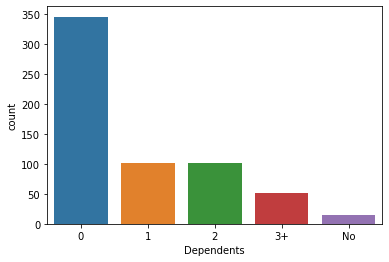

In [28]:
# Visualizing the count of Dependents 
print(df["Dependents"].value_counts())
sns.countplot(df["Dependents"])
plt.show()

The applicants who have 0 dependents have high counts and the applicants having more than 3 dependents counts are very less.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


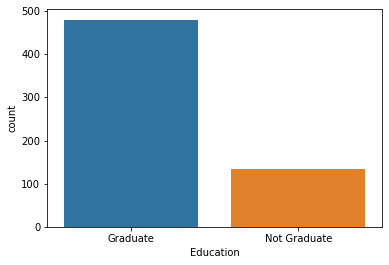

In [29]:
print(df["Education"].value_counts())
sns.countplot(df["Education"])
plt.show()

The count of Graduate applicants is high in counts means the maximum number of Graduated applicants are applying for the loan.

No     532
Yes     82
Name: Self_Employed, dtype: int64


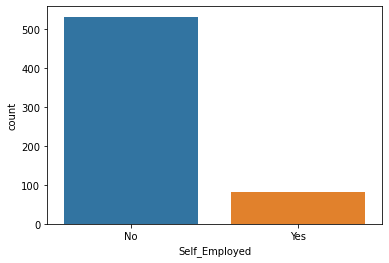

In [30]:
print(df["Self_Employed"].value_counts())
sns.countplot(df["Self_Employed"])
plt.show()

Most of the applicants or not self employed that means they might working in the public sectors and only 82 applicants are self employed and running their own bussiness.

1.0    525
0.0     89
Name: Credit_History, dtype: int64


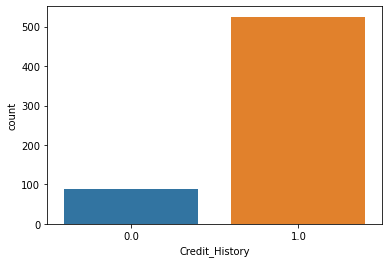

In [32]:
print(df["Credit_History"].value_counts())
sns.countplot(df["Credit_History"])
plt.show()

Most of the applicants who have credit history 1 are high in numbers.

## Distribution of skewness:

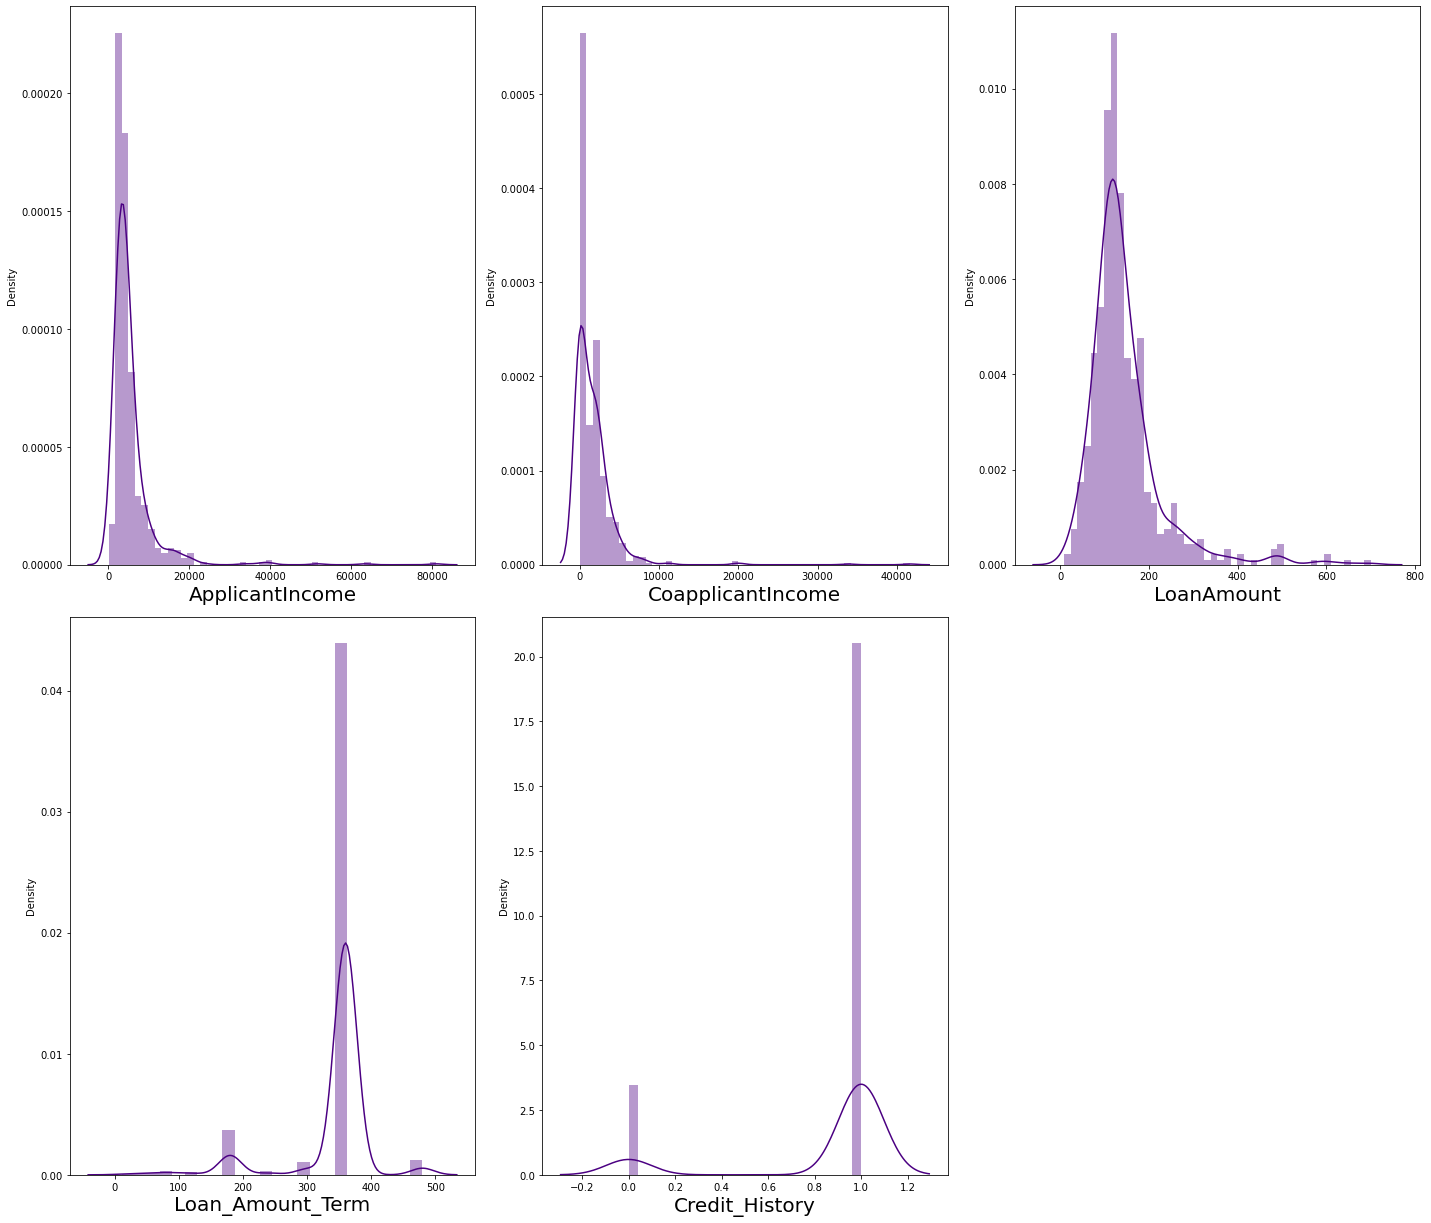

In [33]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="indigo")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


The data is not normally distributed in any of the columns. The mean value is greater than the median in ApplicantIncome, CoapplicantIncome, LoanAmount and TotalIncome which means they are skewed to right. The median is greater than the mean in Loan_Amount_Term and Credit_History columns which means they are skewed to left. We will remove these skewness using appripriate methods in the later part.

## Bivariate Analysis:

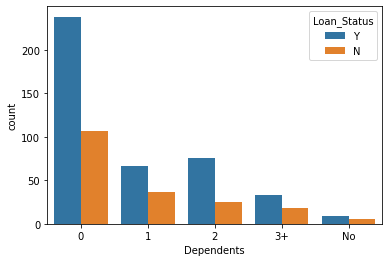

In [34]:
#Visualizing count of Dependents of the applicants on the basis of loan status
sns.countplot(df["Dependents"],hue=df["Loan_Status"])
plt.show()

he count of 0 dependents is high which means most of the applicants have no dependents. Having dependents means having commitments. The 3+ dependents means more than 3 applicants have dependents.

The applicants who have dependents 0 are more likely to get their loan approved.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


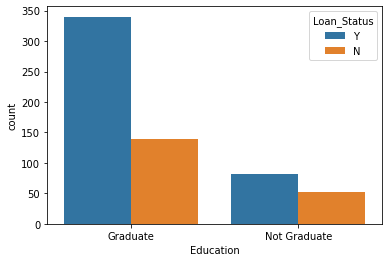

In [35]:
#Visualizing count of Education of the applicants
print(df["Education"].value_counts())
sns.countplot(df["Education"],hue=df["Loan_Status"])
plt.show()

Most of the applicants who are applying for loan are graduated and only few are not graduated. Also the applicants who are graduated have tendency of getting loans than who are not.

No     532
Yes     82
Name: Self_Employed, dtype: int64


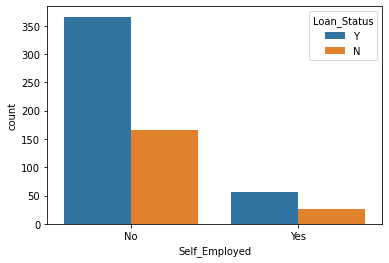

In [37]:
#Visualizing whether the applicants are Self_Employed or not 
print(df["Self_Employed"].value_counts())
sns.countplot(df["Self_Employed"],hue=df["Loan_Status"])
plt.show()

Most of the applicants are not Self_Employed means they are working in public sectors and only few of the applicants are Self_Employed.

The applicants who are not self employed have the tendancy of getting their loans than self employed applicants.

1.0    525
0.0     89
Name: Credit_History, dtype: int64


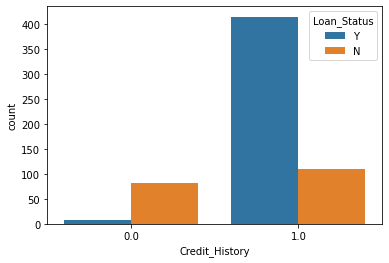

In [38]:
#Visualizing the count of the Credit_History of the applicants
print(df["Credit_History"].value_counts())
sns.countplot(df["Credit_History"], hue=df["Loan_Status"])
plt.show()

The Credit_History gives the information of the applicants who took loan in the past have cleared or not. Here we can notice the applicants who have credit histoty 1 have high counts which means most of the applicants have cleared their past loan only few of them have to clear the loan.

The applicants who have credit history 1 have got their loan approval which means they have cleared their past loans.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


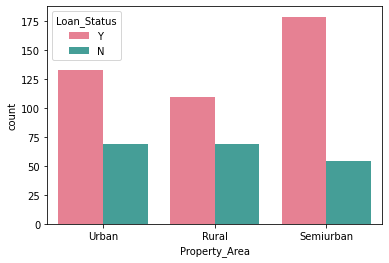

In [39]:
#Visualizing Property_Area of the applicants
print(df["Property_Area"].value_counts())
sns.countplot(df["Property_Area"],hue=df["Loan_Status"],palette="husl")
plt.show()

Most of the applicants from the Semiurban are applying for loan followed by Urban area. Also they have more chance of getting their loan approval.

Male      502
Female    112
Name: Gender, dtype: int64


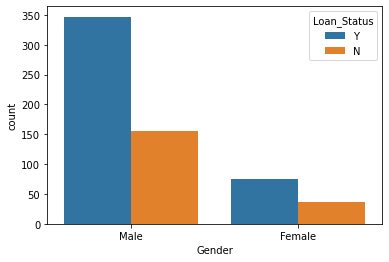

In [41]:
#Visualizing Gender of the applicants
print(df["Gender"].value_counts())
sns.countplot(df["Gender"],hue=df["Loan_Status"])
plt.show()

The male applicants who have applied for the loan have got approved compared to the female applicants.

Yes    398
No     213
0        3
Name: Married, dtype: int64


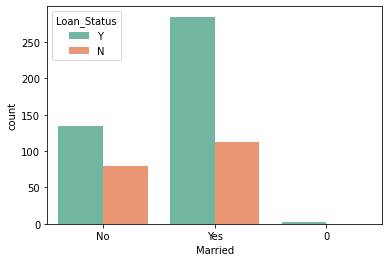

In [42]:
#Visualizing Married status of the applicants
print(df["Married"].value_counts())
sns.countplot(df["Married"],hue=df["Loan_Status"],palette="Set2")
plt.show()

There are more number of Male applicants who are applyimg for loan than compared to Female applicants. Also more Male candidates' loans got approved compared to Female.

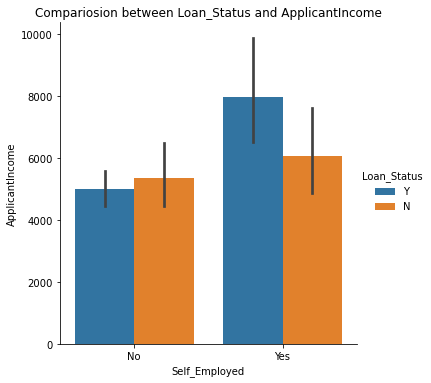

In [43]:
# Cheking relation between Self_Employed and ApplicantIncome
sns.catplot(x='Self_Employed',y="ApplicantIncome",data=df,kind="bar",hue='Loan_Status')
plt.title("Compariosion between Loan_Status and ApplicantIncome")
plt.show()

The applicants whose loan got approved have average income and have their own bussiness means they are self employed.

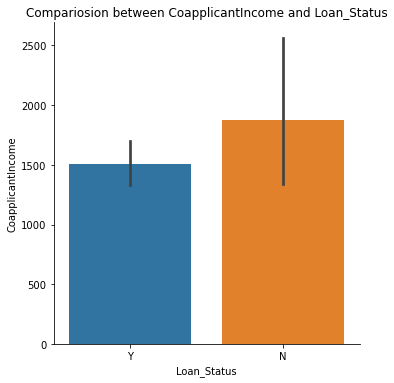

In [44]:
# Checking relation between Loan_Status and CoapplicantIncome
sns.catplot(x='Loan_Status',y="CoapplicantIncome",data=df,kind="bar")
plt.title("Compariosion between CoapplicantIncome and Loan_Status")
plt.show()

The coapplicants who got loan have average income.

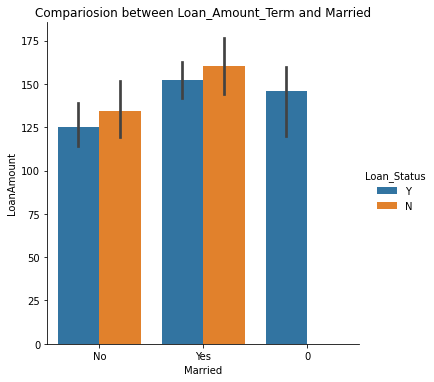

In [45]:
# Checking relation between LoanAmount and Married on the basis of target
sns.catplot(x="Married",y='LoanAmount',data=df,kind="bar",hue="Loan_Status")
plt.title("Compariosion between Loan_Amount_Term and Married")
plt.show()

The applicants who got married and have average loan amount have more tendency to getting loan.

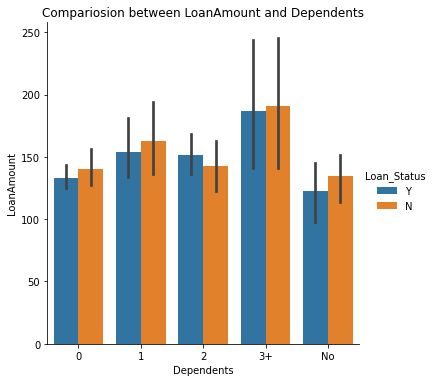

In [46]:
# Checking relation between Loan_Amount and Dependents on the basis of target
sns.catplot(x='Dependents',y="LoanAmount",data=df,kind="bar",hue="Loan_Status")
plt.title("Compariosion between LoanAmount and Dependents")
plt.show()

The applicants who have more than 3 dependents with average loan amount have got their loan approved.

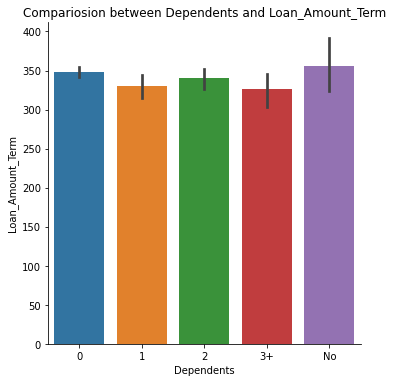

In [47]:
# Checking relation between Loan_Amount_Term and Dependents
sns.catplot(x="Dependents",y='Loan_Amount_Term',data=df,kind="bar")
plt.title("Compariosion between Dependents and Loan_Amount_Term")
plt.show()

The applicants 0 dependents have high Loan amount term followed by the dependents 2.

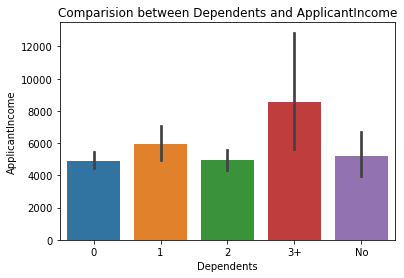

In [48]:
# let's check the applicant income as per Dependents
sns.barplot(x="Dependents",y="ApplicantIncome",data=df)
plt.title("Comparision between Dependents and ApplicantIncome")
plt.show()

The applicants dependents more than 3 has high average income and dependents with 2 has less income.

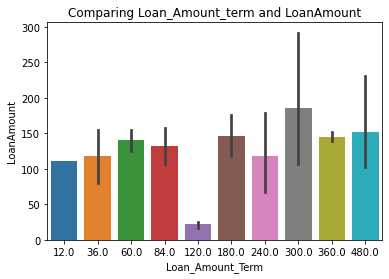

In [50]:
#Comparing Loan_Amount_term and LoanAmount
sns.barplot(x="Loan_Amount_Term",y="LoanAmount",data=df)
plt.title("Comparing Loan_Amount_term and LoanAmount")
plt.show()

The loan amount term 300.0 is high with loan amount compared to others.

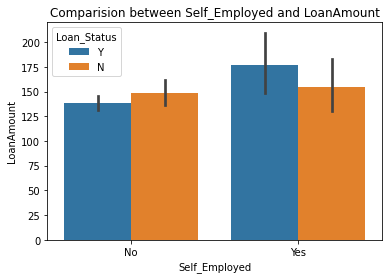

In [51]:
# let's compare the loan amount with self employed
sns.barplot(x="Self_Employed",y="LoanAmount",data=df,hue="Loan_Status")
plt.title("Comparision between Self_Employed and LoanAmount")
plt.show()

The average loan amount demanded by the self employed is more compare to the other also the loan approval for self employes applicants with avarage loan amount is high compare to the applicants who are not self employed.

## Multivariate Analysis:

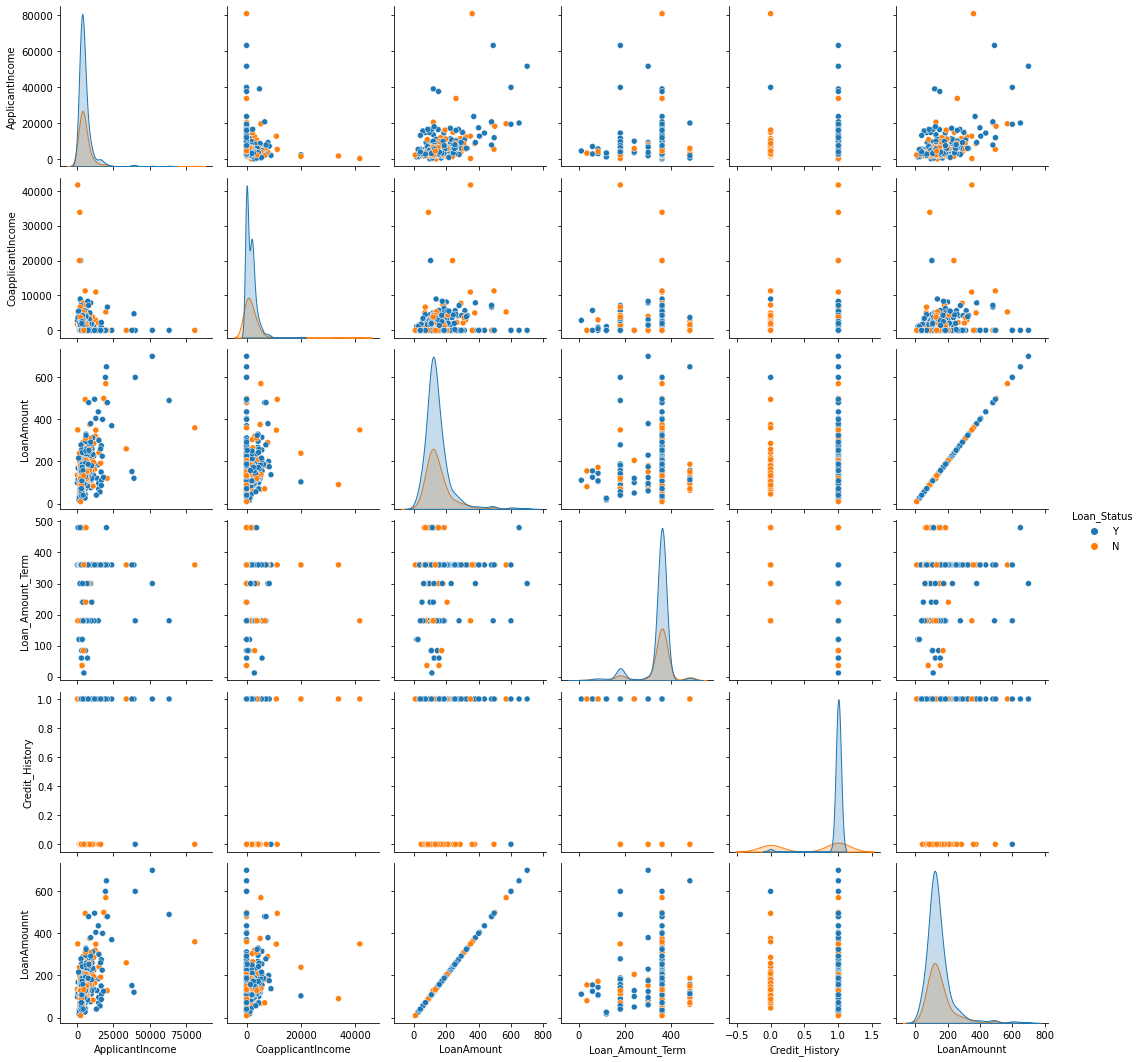

In [52]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Loan_Status")

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Loan_Status".

Here we can observe the relation between the features and label.

We can observe the linear relationship between ApplicantIncome and LoanAmount, CoapplicantIncome and LoanAmount, ApplicantIncome and TotalIncome.

We can also observe the correlation in some columns also there are outliers present in some of the columns.

## Identifying the outliers:

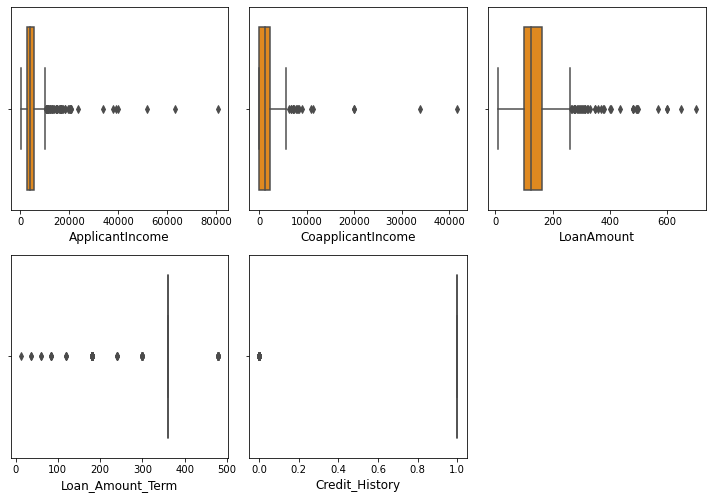

In [53]:
# Identifying the outliers present in numerical columns using boxplo

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="darkorange")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()


We can observe the outliers present in all the columns. But the columns Credit history has only two unique values so no need to remove outliers in this column. Let's remove outliers in remaining columns them using Zscore method.

### Removing outliers:

In [55]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmounnt'],
      dtype='object')

## 1.Zscore method:

In [56]:
# numerical columns containing outliers
features = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]

# Using Zscore method to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

array([[0.07299082, 0.55448733, 0.30275919, 0.2732313 ],
       [0.13441195, 0.03873155, 0.20764834, 0.2732313 ],
       [0.39374734, 0.55448733, 0.94475737, 0.2732313 ],
       ...,
       [0.43717437, 0.47240418, 1.27845856, 0.2732313 ],
       [0.35706382, 0.55448733, 0.49379411, 0.2732313 ],
       [0.13441195, 0.55448733, 0.14820407, 0.2732313 ]])

Now we have removed the outliers, let's check the dataloss by creating new dataframe.

In [57]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmounnt
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,128.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,128.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,66.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,120.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,141.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,71.0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,40.0
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,253.0
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,187.0


In [58]:
# Shape of original dataset
df.shape

(614, 13)

In [59]:
# Shape of new dataframe
new_df.shape

(577, 13)

After removing the outliers we have 577 rows and 12 columns.

In [61]:
# Checking the the data loss
data_loss = (614-577)/614*100
data_loss

6.026058631921824

I am losing only 6% data, hence I am removing outliers.

Let's remove the outliers and check data loss using IQR method.

### 2. IQR (Inter Quantile Range) method:

In [62]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [63]:
df1.shape

(459, 13)

Using IQR method the dataframe has 459 rows and 12 columns.

In [64]:
# Let's check the dataloss
data_loss = (614-459)/614*100
data_loss

25.2442996742671

Using IQR method I am losing 25% of data, so considering Zscore method.

### Checking for skewness: 

In [65]:
# Checking the skewness
new_df.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.163426
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
LoanAmounnt          1.151525
dtype: float64

The skewness present in all the above columns. Here the columns Credit_History and Loan_Amount_Term have categorical data of integer type so no need to remove skewness in these columns.

## Removing Skewness using yeo-johnson method:

In [66]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [67]:
new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,-0.145633
1,0.234783,0.744117,0.008621
2,-0.527201,-1.122446,-1.432788
3,-0.791972,0.895786,-0.145633
4,0.728848,-1.122446,0.245833


In [68]:
# Checking skewness after using yeo-johnson ethod
new_df.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047768
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
LoanAmounnt          1.151525
dtype: float64

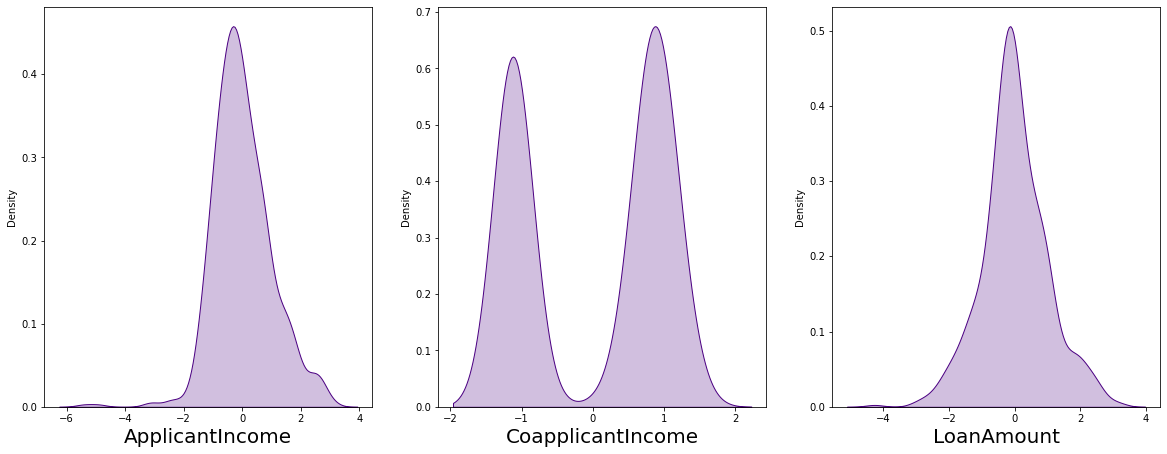

In [69]:
# After removing skewness let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


The data is almost normal also we have removed the skewness that we can notice in the above dist plot.

### Encoding the categorical columns using Label Encoding:

In [70]:
categorical_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [71]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

Encoding the categorical columns using label encoder.

In [72]:
new_df[categorical_col]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,1,0,0,0,2,1
1,1,2,1,0,0,0,0
2,1,2,0,0,1,2,1
3,1,2,0,1,0,2,1
4,1,1,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,1,0,0,0,0,1
610,1,2,3,0,0,0,1
611,1,2,1,0,0,2,1
612,1,2,2,0,0,2,1


The categorical columns have been converted into numerical columns by using label encoding.

## Correlation between the target variable and independent variables using HEATMAP:

In [73]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmounnt
Gender,1.000000,0.376361,0.164239,0.045696,-0.006207,0.058590,0.234551,0.171487,-0.104983,0.013172,-0.026340,0.017408,0.158431
Married,0.376361,1.000000,0.241290,0.035598,-0.007271,-0.037514,0.338528,0.169706,-0.128644,0.009897,0.002186,0.072306,0.154699
Dependents,0.164239,0.241290,1.000000,0.071052,0.041618,0.119716,-0.015377,0.111241,-0.063578,-0.066324,0.037760,-0.002160,0.109187
Education,0.045696,0.035598,0.071052,1.000000,-0.007139,-0.176074,0.049739,-0.129539,-0.090523,-0.075217,-0.068596,-0.092658,-0.149369
Self_Employed,-0.006207,-0.007271,0.041618,-0.007139,1.000000,0.212260,-0.087338,0.116899,-0.032914,-0.016390,-0.028253,-0.026525,0.121562
ApplicantIncome,0.058590,-0.037514,0.119716,-0.176074,0.212260,1.000000,-0.360946,0.430640,-0.069429,0.028825,-0.011364,-0.002484,0.455548
CoapplicantIncome,0.234551,0.338528,-0.015377,0.049739,-0.087338,-0.360946,1.000000,0.201567,0.000951,0.006564,-0.074476,0.079344,0.175641
LoanAmount,0.171487,0.169706,0.111241,-0.129539,0.116899,0.430640,0.201567,1.000000,0.050277,-0.003309,-0.099771,-0.021065,0.974624
Loan_Amount_Term,-0.104983,-0.128644,-0.063578,-0.090523,-0.032914,-0.069429,0.000951,0.050277,1.000000,0.027392,-0.057004,-0.020291,0.039696
Credit_History,0.013172,0.009897,-0.066324,-0.075217,-0.016390,0.028825,0.006564,-0.003309,0.027392,1.000000,-0.008121,0.560936,0.009694


This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map.

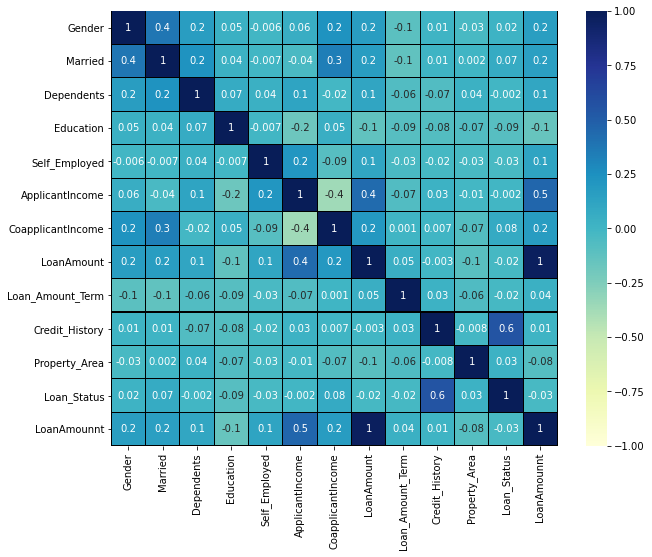

In [74]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,8))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

The target column Loan_Status is highly positively correlated with the feature Credit_History.

The other features have very less correlation with the target column.

Also we can notice there is no multicollinearity issue in the features. Features have moderate level of correlation with each other.

ApplicantIncome and Gender is very less correlated with the target.

Dark shades are highly correlated and light shades are very less correlated.

In [75]:
cor['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.560936
CoapplicantIncome    0.079344
Married              0.072306
Property_Area        0.026507
Gender               0.017408
Dependents          -0.002160
ApplicantIncome     -0.002484
Loan_Amount_Term    -0.020291
LoanAmount          -0.021065
Self_Employed       -0.026525
LoanAmounnt         -0.030169
Education           -0.092658
Name: Loan_Status, dtype: float64

## Visualizing the correlation between label and features using bar plot:

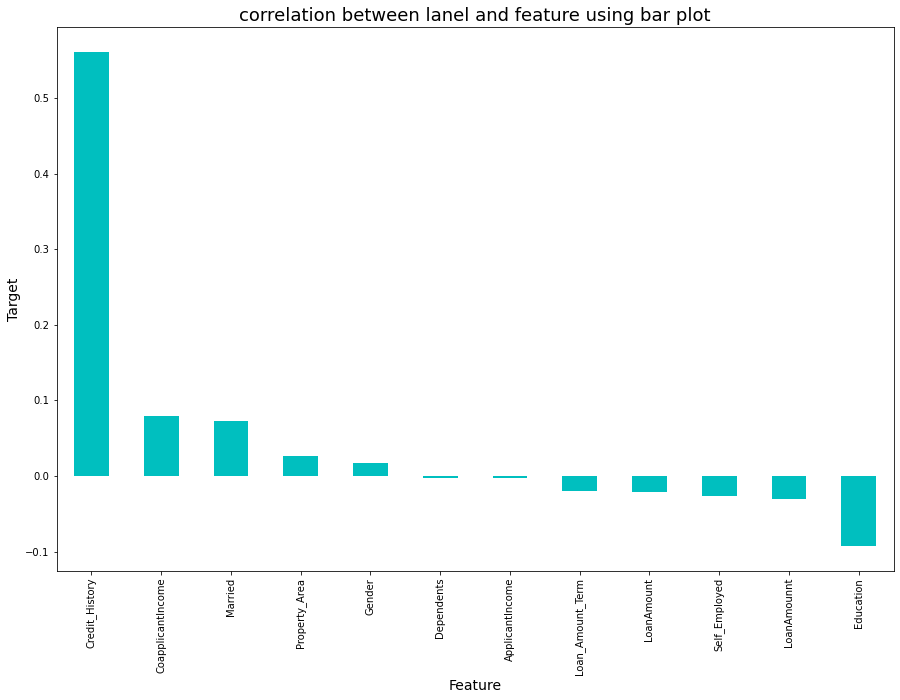

In [76]:
plt.figure(figsize=(15,10))
new_df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

Here the columns ApplicantIncome has very less correlation with the target so we can drop this column if necessary.

## Separating the features and label variables into x and y:

In [79]:
x = new_df.drop("Loan_Status", axis=1)
y = new_df["Loan_Status"]

We have separated both dependent and independent variables.

In [80]:
# Dimension of x
x.shape

(577, 12)

In [81]:
# Dimension of y
y.shape

(577,)

## Feature Scaling using Standard Scalarization:

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmounnt
0,0.477137,-1.302871,-0.737994,-0.541961,-0.380580,0.681780,-1.122446,-0.145633,0.230853,0.418513,1.227472,-0.130895
1,0.477137,0.734409,0.158475,-0.541961,-0.380580,0.234783,0.744117,0.008621,0.230853,0.418513,-1.306522,-0.130895
2,0.477137,0.734409,-0.737994,-0.541961,2.627567,-0.527201,-1.122446,-1.432788,0.230853,0.418513,1.227472,-1.235554
3,0.477137,0.734409,-0.737994,1.845150,-0.380580,-0.791972,0.895786,-0.145633,0.230853,0.418513,1.227472,-0.273432
4,0.477137,-1.302871,-0.737994,-0.541961,-0.380580,0.728848,-1.122446,0.245833,0.230853,0.418513,1.227472,0.100727
...,...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.302871,-0.737994,-0.541961,-0.380580,-0.587375,-1.122446,-1.288499,0.230853,0.418513,-1.306522,-1.146468
573,0.477137,0.734409,1.951412,-0.541961,-0.380580,0.035386,-1.122446,-2.335137,-3.243986,0.418513,-1.306522,-1.698797
574,0.477137,0.734409,0.158475,-0.541961,-0.380580,1.281658,0.173344,1.845431,0.230853,0.418513,1.227472,2.096238
575,0.477137,0.734409,1.054943,-0.541961,-0.380580,1.164426,-1.122446,0.981439,0.230853,0.418513,1.227472,0.920312


I have scaled the data using standard scalarizaion method to overcome with the issue of data biasness.

In [83]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

Here we can notice the class imbalancing issue so lets uae SMOTE to balance the data.

Oversampling:

In [85]:
#Checking the value count of target column
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [86]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

ModuleNotFoundError: No module named 'imblearn'

In [87]:
# Checking the value counts again
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [88]:
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmounnt
0,1,1,0,0,0,0.681780,-1.122446,-0.145633,360.0,1.0,2,1,128.0
1,1,2,1,0,0,0.234783,0.744117,0.008621,360.0,1.0,0,0,128.0
2,1,2,0,0,1,-0.527201,-1.122446,-1.432788,360.0,1.0,2,1,66.0
3,1,2,0,1,0,-0.791972,0.895786,-0.145633,360.0,1.0,2,1,120.0
4,1,1,0,0,0,0.728848,-1.122446,0.245833,360.0,1.0,2,1,141.0


We have done with the preprocessing and data cleaning. Now let's move to build the model.

## Finding Best Random State and Accuracy:

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = RandomForestClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8563218390804598  on Random_state  86


The best accuracy is 88.70% on the Random state 78.

## Creating train_test split:

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

We have created a new train test split using Random State.

### Classification Algorithms:

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

## Decision Tree Classifier:

In [93]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.7528735632183908
[[36 19]
 [24 95]]
              precision    recall  f1-score   support

           0       0.60      0.65      0.63        55
           1       0.83      0.80      0.82       119

    accuracy                           0.75       174
   macro avg       0.72      0.73      0.72       174
weighted avg       0.76      0.75      0.76       174



The accuracy using Decision Tree Classifier is 67.81%.

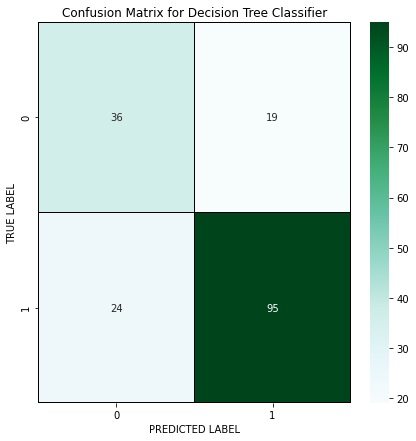

In [94]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

This is the confusion matrix for Decision Tree classifier where we can observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

## Random Forest Classifier:

In [95]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8563218390804598
[[ 35  20]
 [  5 114]]
              precision    recall  f1-score   support

           0       0.88      0.64      0.74        55
           1       0.85      0.96      0.90       119

    accuracy                           0.86       174
   macro avg       0.86      0.80      0.82       174
weighted avg       0.86      0.86      0.85       174



The accuracy using Random Forest Classifier is 85.05%.

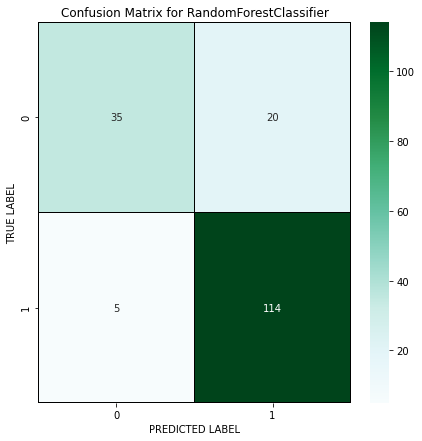

In [96]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

This is the confusion matrix for Decision Tree classifier where we can observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

### Logistic Regression:

In [97]:
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.8735632183908046
[[ 33  22]
 [  0 119]]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        55
           1       0.84      1.00      0.92       119

    accuracy                           0.87       174
   macro avg       0.92      0.80      0.83       174
weighted avg       0.89      0.87      0.86       174



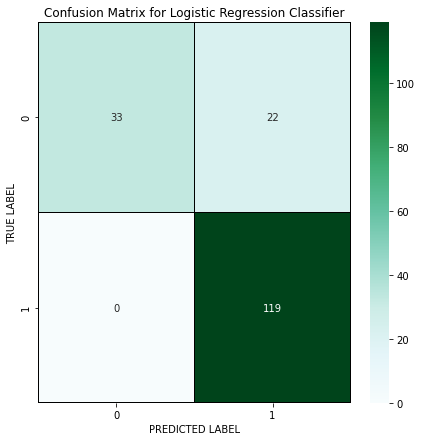

In [98]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

This is the confusion matrix for Decision Tree classifier where we can observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

## Support Vector Machine Classifier:

In [99]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.867816091954023
[[ 32  23]
 [  0 119]]
              precision    recall  f1-score   support

           0       1.00      0.58      0.74        55
           1       0.84      1.00      0.91       119

    accuracy                           0.87       174
   macro avg       0.92      0.79      0.82       174
weighted avg       0.89      0.87      0.86       174



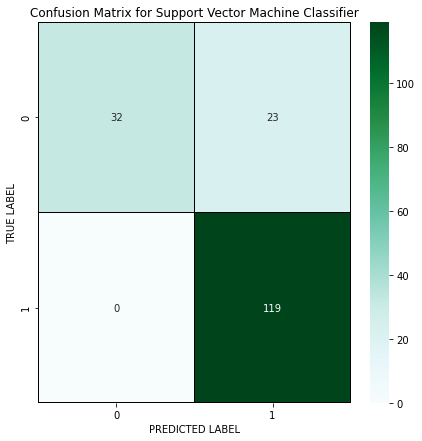

In [100]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

This is the confusion matrix for Decision Tree classifier where we can observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

## KNeighbors Classifier:

In [101]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.8218390804597702
[[ 29  26]
 [  5 114]]
              precision    recall  f1-score   support

           0       0.85      0.53      0.65        55
           1       0.81      0.96      0.88       119

    accuracy                           0.82       174
   macro avg       0.83      0.74      0.77       174
weighted avg       0.83      0.82      0.81       174



The accuracy using KNeighbors Classifier is 85.05%.

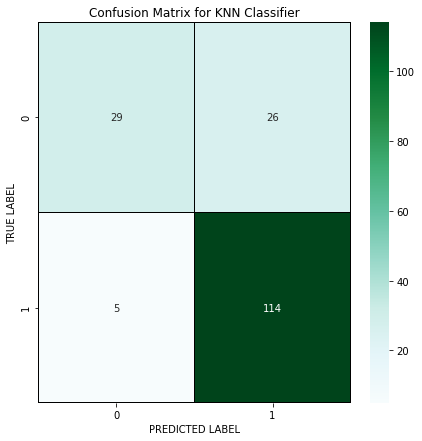

In [102]:
# Lets plot confusion matrix for KNN Classifier
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

This is the confusion matrix for Decision Tree classifier where we can observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

### Gradient Boosting Classifier:

In [103]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8448275862068966
[[ 34  21]
 [  6 113]]
              precision    recall  f1-score   support

           0       0.85      0.62      0.72        55
           1       0.84      0.95      0.89       119

    accuracy                           0.84       174
   macro avg       0.85      0.78      0.80       174
weighted avg       0.85      0.84      0.84       174



The accuracy using Gradient Boosting Classifier is 85.05%.

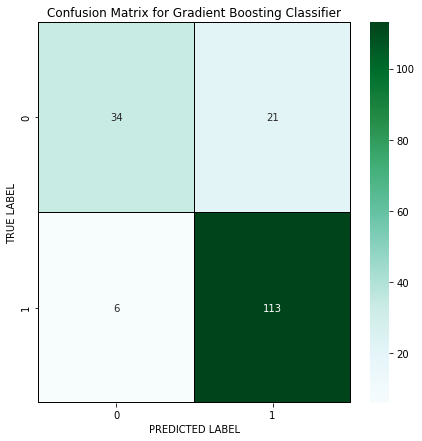

In [104]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()


This is the confusion matrix for Decision Tree classifier where we can observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

## AdaBoost Classifier:

In [105]:
# Checking accuracy for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

# Prediction
predABC = ABC.predict(x_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))

0.7873563218390804
[[ 32  23]
 [ 14 105]]
              precision    recall  f1-score   support

           0       0.70      0.58      0.63        55
           1       0.82      0.88      0.85       119

    accuracy                           0.79       174
   macro avg       0.76      0.73      0.74       174
weighted avg       0.78      0.79      0.78       174



The accuracy using AdaBoost Classifier is 82.75%.

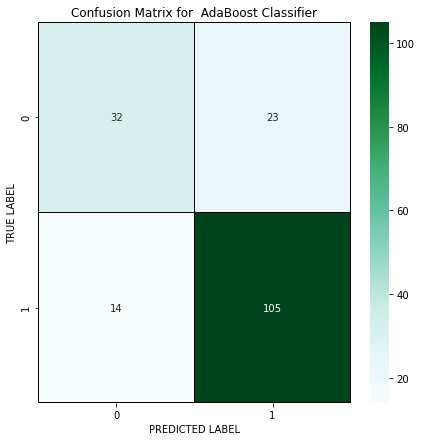

In [107]:
# Lets plot confusion matrix for  AdaBoost Classifier
cm = confusion_matrix(y_test,predABC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  AdaBoost Classifier')
plt.show()

This is the confusion matrix for Decision Tree classifier where we can observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

## GaussianNB Classifier:

In [108]:
# Checking accuracy for GaussianNB Classifier
NB = GaussianNB()
NB.fit(x_train,y_train)

# Prediction
predNB = NB.predict(x_test)

print(accuracy_score(y_test, predNB))
print(confusion_matrix(y_test, predNB))
print(classification_report(y_test,predNB))

0.867816091954023
[[ 32  23]
 [  0 119]]
              precision    recall  f1-score   support

           0       1.00      0.58      0.74        55
           1       0.84      1.00      0.91       119

    accuracy                           0.87       174
   macro avg       0.92      0.79      0.82       174
weighted avg       0.89      0.87      0.86       174



The accuracy using KNN is 86.78%.

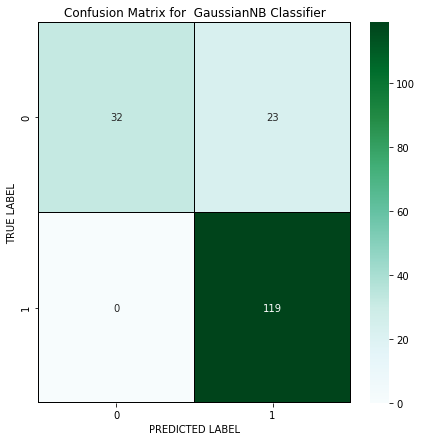

In [109]:
# Lets plot confusion matrix for  AdaBoost Classifier
cm = confusion_matrix(y_test,predNB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  GaussianNB Classifier')
plt.show()

This is the confusion matrix for Decision Tree classifier where we can observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

## Checking the Cross Validation Score:

In [110]:
from sklearn.model_selection import cross_val_score

In [111]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.7175112443778111


In [112]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.7990254872563718


In [113]:
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

0.8163418290854573


In [114]:
# cv score for Support Vector Machine Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.8145877061469265


In [115]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.7938080959520241


In [116]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

0.7921289355322341


In [117]:
# cv score for AdaBoosting Classifier
print(cross_val_score(ABC,x,y,cv=5).mean())

0.8008095952023988


In [118]:
# cv score for GaussianNB Classifier
print(cross_val_score(NB,x,y,cv=5).mean())

0.8111244377811093


Above are the cross validation score for the models.

## The difference between accuracy score and cross validation score for the models used:

Decision Tree Classifier = 6.95%

Random Forest Classifier = 8.05%

Logistic Regression = 8.16%

SVC = 8.14%

KNeighbors Classifier = 0.78%

Gradient Boosting Classifier = 7.85%

Adaboost Classifier = 8.00%

GaussianNB Classifier = 8.11%

From the difference between the accuracy score and the cross validation score we can conclude that KNeighbors Classifier as our best fitting model whch is giving very less difference compare to other models.

## Hyper Parameter Tuning:

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
# KNeighbors Classifier

parameters = {'n_neighbors':[2,3,4,5,6],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[10,20,30,40,50],
              'weights':['uniform','distance'],
              'p':[1,2,3,4,5]}

In [125]:
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [126]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6], 'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [127]:
GCV.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 5,
 'p': 5,
 'weights': 'uniform'}

In [128]:
Loan = KNN(algorithm='auto', leaf_size=10, n_neighbors=4, weights='distance',p=1)
Loan.fit(x_train, y_train)
pred = Loan.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

77.58620689655173


The accuracy of best model increased by 9% after tuning and giving 77.58% which is very good.

## Plotting ROC and compare AUC for all the models used:

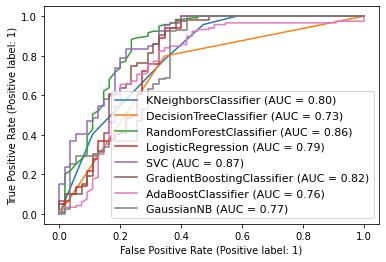

In [129]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ABC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(NB, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

This is the AUC-ROC curve for the models taht we have used and is plotted False positive rate against True positive rate.

## Plotting ROC and Compare AUC for the best model KNeighbors Classifier:

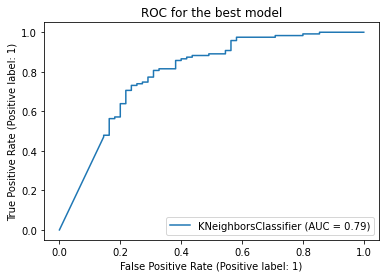

In [130]:
# Let's check the Auc for the best model after hyper parameter tuning
plot_roc_curve(Loan, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

This is the ROC curve for the best model KNN and AUC for KNN is 91%.

## Saving The Model:

In [131]:
# Saving the model using .pkl
import joblib
joblib.dump(Loan,"Loan_Application_Status.pkl")

['Loan_Application_Status.pkl']

We have saved our model using joblib library.

## Predicting the saved model:

In [132]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Loan_Application_Status.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

These are the predicted loan approval status of the applicants.

In [133]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,1,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
169,0,0
170,1,1
171,1,1
172,1,0


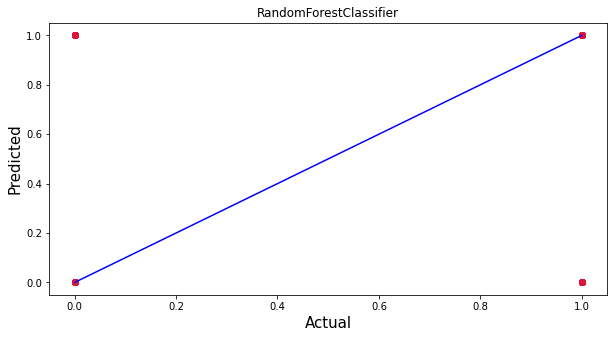

In [134]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("RandomForestClassifier")
plt.show()

Plotting Actual vs Predicted.